In [1]:
import pandas as pd
data = pd.read_csv("Global_Pollution_Analysis.csv")
data.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Weather_Conditions Traffic_Conditions Vehicle_Type
data['Country']= label.fit_transform(data['Country'])
data['Year'] = label.fit_transform(data['Year'])


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Industrial_Waste (in tons)', 'CO2_Emissions (in MT)']] = scaler.fit_transform(data[['Industrial_Waste (in tons)', 'CO2_Emissions (in MT)']])


In [17]:
data["Yearly_pollution_trend"] = data.groupby("Country")["CO2_Emissions (in MT)"].diff().fillna(0)
data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Yearly_pollution_trend
0,77,5,272.70,124.27,51.95,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,0.000000
1,147,1,86.72,60.34,117.22,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,0.000000
2,136,16,91.59,83.36,121.72,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,0.000000
3,38,18,280.61,67.16,93.58,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,0.000000
4,46,8,179.16,127.53,121.55,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,92,4,115.84,78.75,42.34,0.491126,81.23,0.061336,17.38,4065.66,6.28,92.96,14818.18,-0.607913
196,13,2,121.82,120.97,63.95,0.746306,25.89,0.927360,16.56,36905.26,15.18,114.02,59238.04,0.407997
197,88,11,149.73,146.92,37.04,0.018228,293.27,0.764915,38.36,24700.29,14.11,183.06,28895.94,0.000000
198,170,2,237.20,113.63,101.96,0.686056,305.61,0.563115,32.17,1443.62,12.44,40.65,17068.01,0.000000


In [23]:
# Scaling pollution indices
scaler_minmax = MinMaxScaler()
data[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]] = scaler_minmax.fit_transform(
    data[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]]
)

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define pollution severity categories based on CO2 emissions
def categorize_pollution(value):
    if value < -0.5:
        return "Low"
    elif -0.5 <= value <= 0.5:
        return "Medium"
    else:
        return "High"

# Apply category labels to CO2 emissions
data["Pollution_Severity"] = data["CO2_Emissions (in MT)"].apply(categorize_pollution)

# Encode target variable (Low -> 0, Medium -> 1, High -> 2)
le = LabelEncoder()
data["Pollution_Severity"] = le.fit_transform(data["Pollution_Severity"])
data


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Yearly_pollution_trend,Pollution_Severity
0,77,5,0.898042,0.553778,0.295481,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,0.000000,1
1,147,1,0.147062,0.173673,0.768178,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,0.000000,1
2,136,16,0.166727,0.310542,0.800768,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,0.000000,0
3,38,18,0.929982,0.214222,0.596973,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,0.000000,1
4,46,8,0.520331,0.573161,0.799537,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,92,4,0.264648,0.283132,0.225884,0.491126,81.23,0.061336,17.38,4065.66,6.28,92.96,14818.18,-0.607913,1
196,13,2,0.288795,0.534158,0.382387,0.746306,25.89,0.927360,16.56,36905.26,15.18,114.02,59238.04,0.407997,0
197,88,11,0.401494,0.688448,0.187500,0.018228,293.27,0.764915,38.36,24700.29,14.11,183.06,28895.94,0.000000,0
198,170,2,0.754694,0.490517,0.657662,0.686056,305.61,0.563115,32.17,1443.62,12.44,40.65,17068.01,0.000000,0


In [31]:
# Select features for classification
features = ["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)"]

# Scale features to fit Naive Bayes assumptions (MultinomialNB expects positive feature values)
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["Pollution_Severity"], test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["Low", "Medium"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.50
Confusion Matrix:
 [[ 0 20]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        20
      Medium       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Optimal K: 19
Accuracy: 0.72
Confusion Matrix:
 [[ 0 11]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        11
      Medium       0.72      1.00      0.84        29

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40



/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


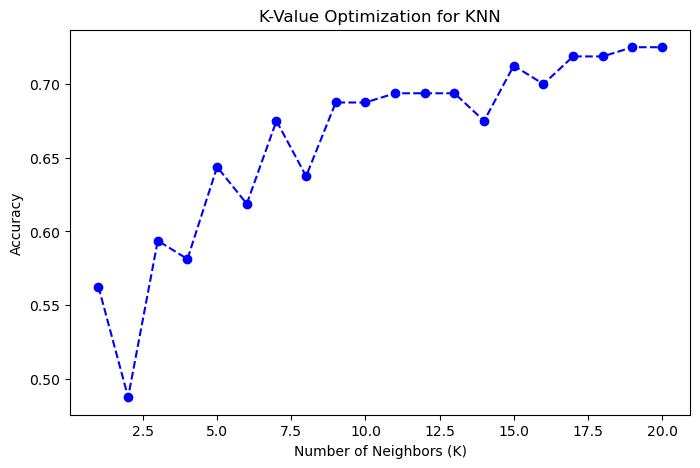

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset

# Define pollution severity categories based on CO2 emissions
def categor_pollution(value):
    if value < -0.75:
        return "Low"
    elif -0.75 <= value <= 0.75:
        return "Medium"
    else:
        return "High"

# Apply category labels to CO2 emissions
data["Pollution_Severity"] = data["CO2_Emissions (in MT)"].apply(categor_pollution)

# Encode target variable (Low -> 0, Medium -> 1, High -> 2)
le = LabelEncoder()
data["Pollution_Severity"] = le.fit_transform(data["Pollution_Severity"])

# Select relevant features for classification
features = ["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)"]

# Scale features to improve KNN performance
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["Pollution_Severity"], test_size=0.2, random_state=42)

# Hyperparameter tuning: Find the optimal K value
param_grid = {"n_neighbors": list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_["n_neighbors"]
print(f"Optimal K: {best_k}")

# Train KNN with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot K values vs Accuracy
k_values = list(range(1, 21))
accuracy_scores = [grid_search.cv_results_["mean_test_score"][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="dashed", color="b")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K-Value Optimization for KNN")
plt.show()


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.70
Confusion Matrix:
 [[ 1 10]
 [ 2 27]]
Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.09      0.14        11
      Medium       0.73      0.93      0.82        29

    accuracy                           0.70        40
   macro avg       0.53      0.51      0.48        40
weighted avg       0.62      0.70      0.63        40



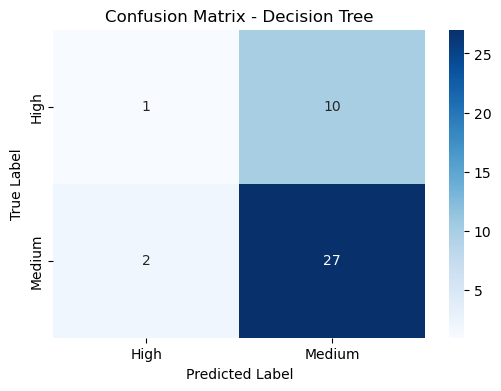

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define pollution severity categories based on CO2 emissions
def categorize_pollution(value):
    if value < -0.75:
        return "Low"
    elif -0.75 <= value <= 0.75:
        return "Medium"
    else:
        return "High"

# Apply category labels to CO2 emissions
data["Pollution_Severity"] = data["CO2_Emissions (in MT)"].apply(categorize_pollution)

# Encode target variable (Low -> 0, Medium -> 1, High -> 2)
le = LabelEncoder()
data["Pollution_Severity"] = le.fit_transform(data["Pollution_Severity"])

# Select relevant features for classification
features = ["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)"]
X = data[features]
y = data["Pollution_Severity"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning: Find the best max_depth and min_samples_split
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train Decision Tree with the best parameters
dt = DecisionTreeClassifier(**best_params, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


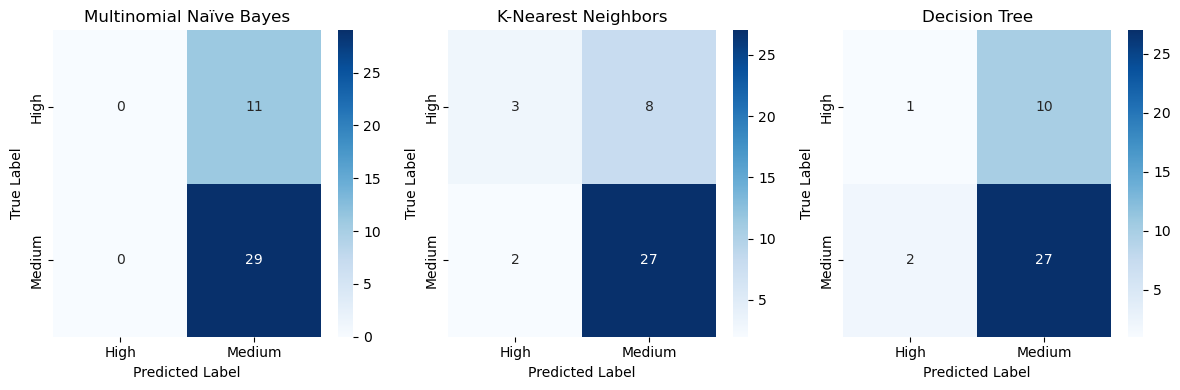

📌 Multinomial Naïve Bayes - Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        11
      Medium       0.72      1.00      0.84        29

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

📌 K-Nearest Neighbors - Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.27      0.38        11
      Medium       0.77      0.93      0.84        29

    accuracy                           0.75        40
   macro avg       0.69      0.60      0.61        40
weighted avg       0.72      0.75      0.71        40

📌 Decision Tree - Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.09      0.14        11
      Medium       0.73      0.93      0.82       

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define pollution severity categories based on CO2 emissions
def categorize_pollution(value):
    if value < -0.75:
        return "Low"
    elif -0.75 <= value <= 0.75:
        return "Medium"
    else:
        return "High"

data["Pollution_Severity"] =data["CO2_Emissions (in MT)"].apply(categorize_pollution)

# Encode target variable (Low -> 0, Medium -> 1, High -> 2)
le = LabelEncoder()
data["Pollution_Severity"] = le.fit_transform(data["Pollution_Severity"])

features = ["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)"]
X = data[features]
y = data["Pollution_Severity"]

# Scale features for KNN and MNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------- Train & Evaluate Models ---------------------

models = {
    "Multinomial Naïve Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, target_names=le.classes_)
    }

# --------------------- Visualize Confusion Matrices ---------------------
plt.figure(figsize=(12, 4))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(res["conf_matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

# --------------------- Print Comparison Metrics ---------------------
for name, res in results.items():
    print(f"📌 {name} - Accuracy: {res['accuracy']:.2f}")
    print("Classification Report:\n", res["classification_report"])
    print("=" * 50)
